# Credit Card Transaction Data Analysis
This notebook analyzes credit card transaction data using pandas, seaborn, and matplotlib.

## Import Libraries
First, let's import the necessary libraries for our analysis.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Examine Data
Now we'll load the CSV file and examine its contents.

In [43]:
# Read the CSV file
df = pd.read_csv('card_transdata.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0       

## Check for Missing Values
Let's examine if there are any missing values in our dataset.

In [44]:
# Check for missing values
print("Total missing values in each column:")
print(df.isnull().sum())

print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df) * 100).round(2))

Total missing values in each column:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

Percentage of missing values in each column:
distance_from_home                0.0
distance_from_last_transaction    0.3
ratio_to_median_purchase_price    0.2
repeat_retailer                   0.7
used_chip                         0.4
used_pin_number                   0.2
online_order                      0.4
fraud                             0.0
dtype: float64


## Drop Missing Values
Remove rows with missing values and check the impact on our dataset.

In [45]:
# Store the original shape
original_shape = df.shape

# Drop rows with missing values
df = df.dropna()

# Print the impact of dropping missing values
print(f"Original number of rows: {original_shape[0]}")
print(f"Number of rows after dropping missing values: {df.shape[0]}")
print(f"Number of rows removed: {original_shape[0] - df.shape[0]}")

Original number of rows: 999
Number of rows after dropping missing values: 977
Number of rows removed: 22


## Visualize Fraud Distribution
Create a countplot to show the distribution of fraud vs. non-fraud transactions.

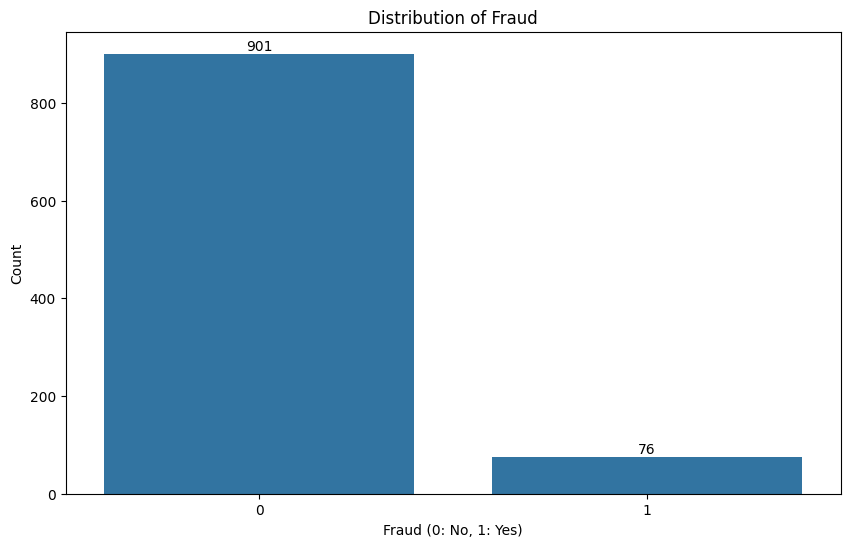

In [46]:
# Plot 1: Fraud Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fraud')
plt.title('Distribution of Fraud')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.show()

## Visualize Transaction Attributes Distribution
Let's create countplots for 'used_pin' and 'repeat_retailer' attributes.

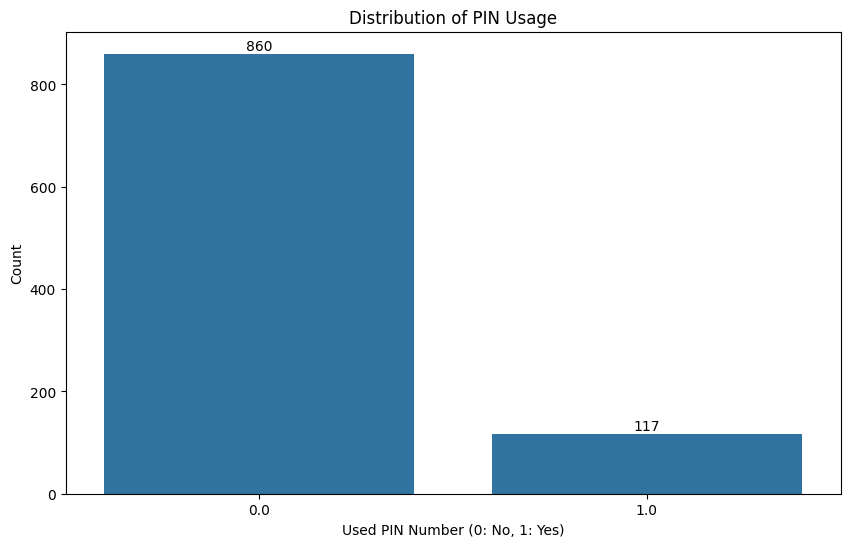

In [47]:
# Plot 2: Used Pin Number Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='used_pin_number')
plt.title('Distribution of PIN Usage')
plt.xlabel('Used PIN Number (0: No, 1: Yes)')
plt.ylabel('Count')
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.show()

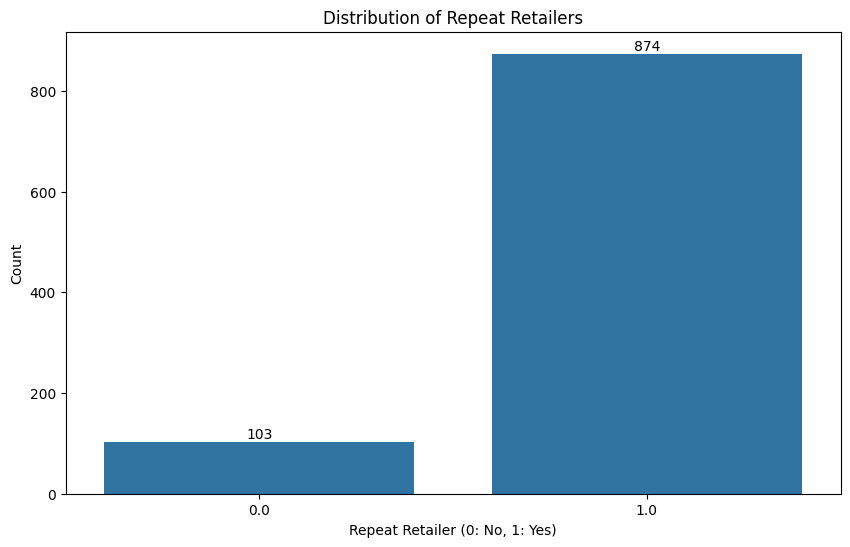

In [48]:
# Plot 3: Repeat Retailer Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='repeat_retailer')
plt.title('Distribution of Repeat Retailers')
plt.xlabel('Repeat Retailer (0: No, 1: Yes)')
plt.ylabel('Count')
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.show()

## Visualize Online Orders Distribution
Create a countplot to show the distribution of online orders vs. non-online orders.

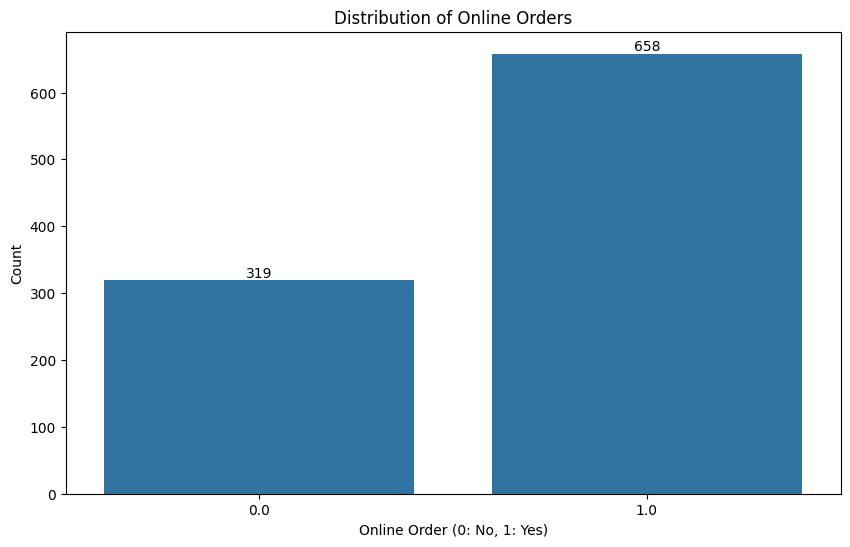

In [49]:
# Plot: Online Orders Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='online_order')
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order (0: No, 1: Yes)')
plt.ylabel('Count')
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.show()

## Purchase Price Analysis
Let's examine the distribution of transaction amounts relative to the median purchase price.

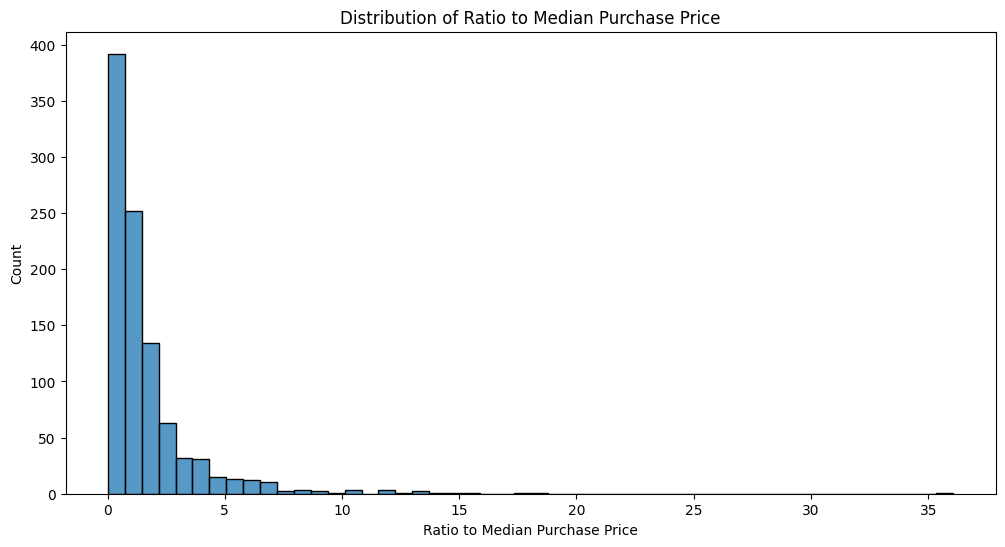

In [50]:
# Create histogram of ratio to median purchase price
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ratio_to_median_purchase_price', bins=50)
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis: Used PIN Number by Fraud Status
Now, let's analyze the relationship between used PIN number and fraud status.

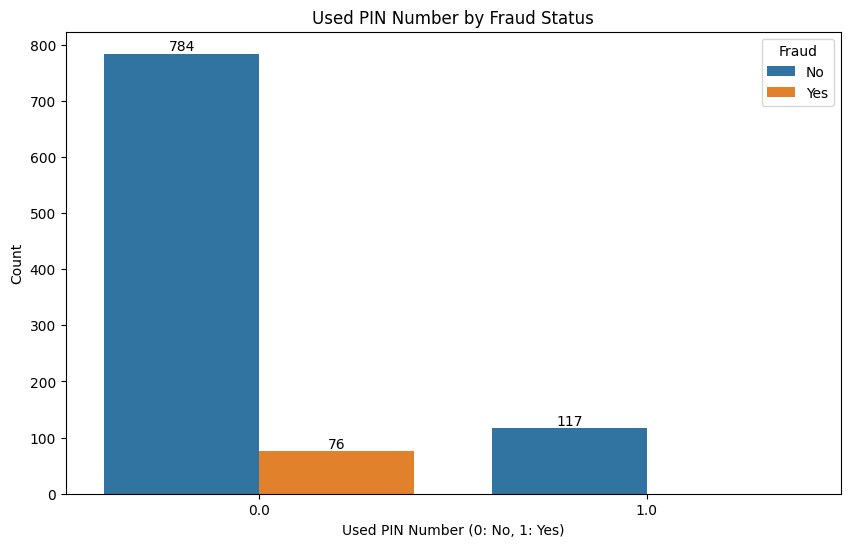

In [51]:
# Bivariate countplot: Used PIN usage by Fraud status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='used_pin_number', hue='fraud')
plt.title('Used PIN Number by Fraud Status')
plt.xlabel('Used PIN Number (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['No', 'Yes'])
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()

## Percentage of Fraud by PIN Usage
Show the percentage of transactions that are fraudulent when a PIN was used vs when it was not.

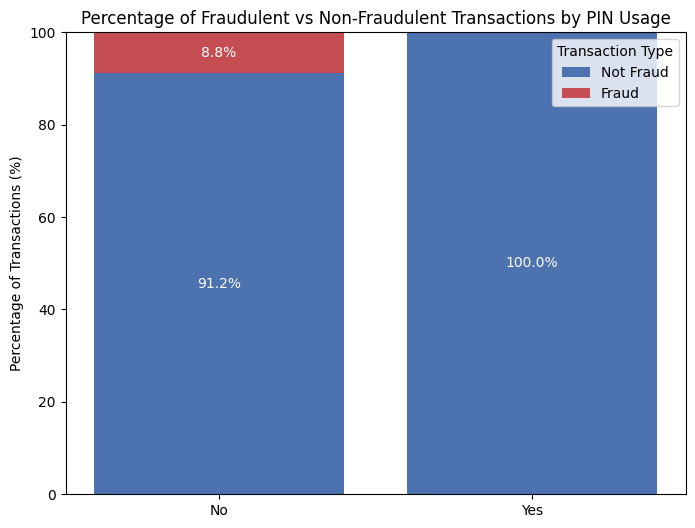

In [52]:
# Percentage of fraudulent vs non-fraudulent transactions by PIN usage (stacked 100% bar chart)
# Compute counts of fraud/non-fraud per used_pin_number
counts = df.groupby(['used_pin_number', 'fraud']).size().unstack(fill_value=0)

# Ensure both fraud columns (0 and 1) exist
for col in [0, 1]:
    if col not in counts.columns:
        counts[col] = 0
counts = counts[[0, 1]]  # columns: 0 = not fraud, 1 = fraud

# Convert to row-wise percentages so each row sums to 100%
percent = counts.div(counts.sum(axis=1), axis=0) * 100

# Prepare x-axis labels (assumes used_pin_number encoded 0/1)
labels = ['No' if int(x) == 0 else 'Yes' for x in percent.index]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bottom = np.zeros(len(percent))
colors = ['#4c72b0', '#c44e52']  # color for not fraud, fraud
for i, col in enumerate(percent.columns):
    vals = percent[col].values
    bars = ax.bar(labels, vals, bottom=bottom, color=colors[i], label=('Not Fraud' if col == 0 else 'Fraud'))
    # Annotate each segment if visible
    for bar, v in zip(bars, vals):
        if v >= 1:
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{v:.1f}%",
                    ha='center', va='center', color='white', fontsize=10)
    bottom += vals

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of Transactions (%)')
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions by PIN Usage')
ax.legend(title='Transaction Type')
plt.show()

## Bivariate Analysis: Online Orders by Fraud Status
Analyze how online orders relate to fraud.

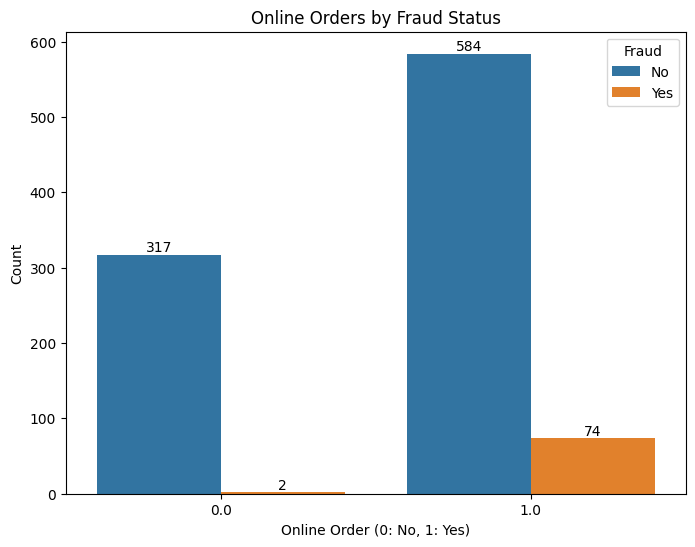

In [53]:
# Bivariate countplot: online_order by fraud
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='online_order', hue='fraud')
ax.set(title='Online Orders by Fraud Status', xlabel='Online Order (0: No, 1: Yes)', ylabel='Count')
for c in ax.containers: ax.bar_label(c)
plt.legend(title='Fraud', labels=['No','Yes'])
plt.show()

## Percentage of Fraud by Online Order (stacked 100% bar chart)
Show percent fraudulent vs non-fraudulent for online vs in-store orders.

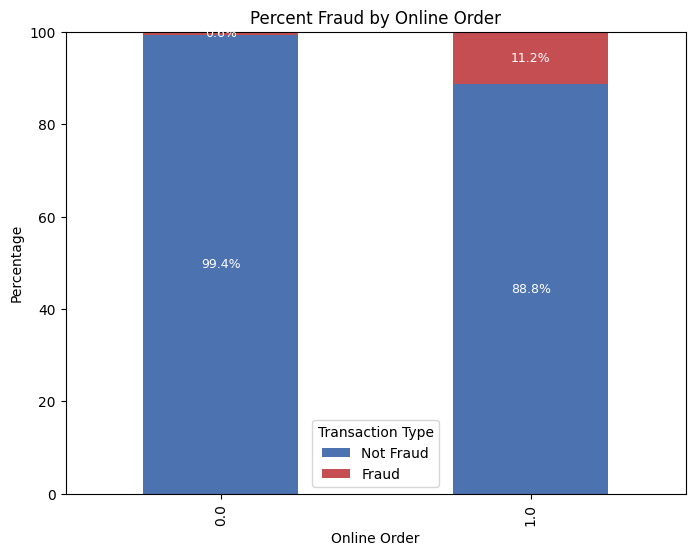

In [54]:
# Stacked 100% bar chart for online_order
counts = df.groupby(['online_order','fraud']).size().unstack(fill_value=0)
percent = counts.div(counts.sum(1), axis=0) * 100
ax = percent.plot(kind='bar', stacked=True, figsize=(8,6), color=['#4c72b0','#c44e52'])
ax.set(title='Percent Fraud by Online Order', xlabel='Online Order', ylabel='Percentage')
for p in ax.patches:
    h = p.get_height()
    if h>0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + h/2, f'{h:.1f}%', ha='center', va='center', color='white', fontsize=9)
plt.ylim(0,100)
plt.legend(['Not Fraud','Fraud'], title='Transaction Type')
plt.show()

## Scatter: Distance vs Ratio to Median Purchase Price
Compare distance_from_last_transaction vs ratio_to_median_purchase_price and color points by fraud status.

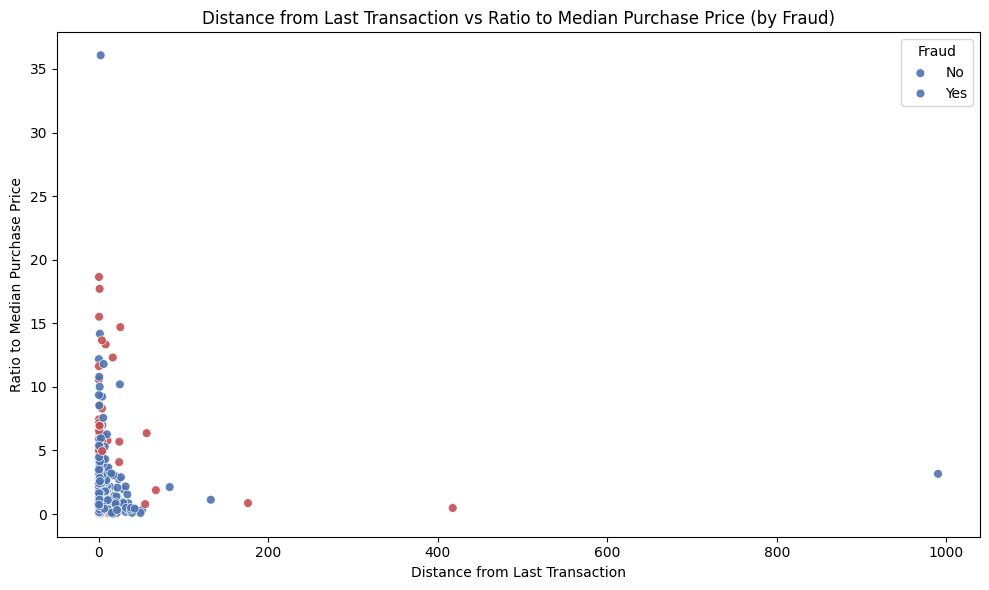

In [55]:
# Scatter plot of distance vs ratio, colored by fraud
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x='distance_from_last_transaction',
                y='ratio_to_median_purchase_price',
                hue='fraud',
                palette={0:'#4c72b0',1:'#c44e52'},
                alpha=0.9,
                s=40)
plt.title('Distance from Last Transaction vs Ratio to Median Purchase Price (by Fraud)')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Fraud', labels=['No','Yes'])
plt.tight_layout()
plt.show()

## Scatter: Fraud vs Non-Fraud Breakdown
Scatter plot comparing ratio_to_median_purchase_price and distance_from_last_transaction, colored and styled by fraud status.

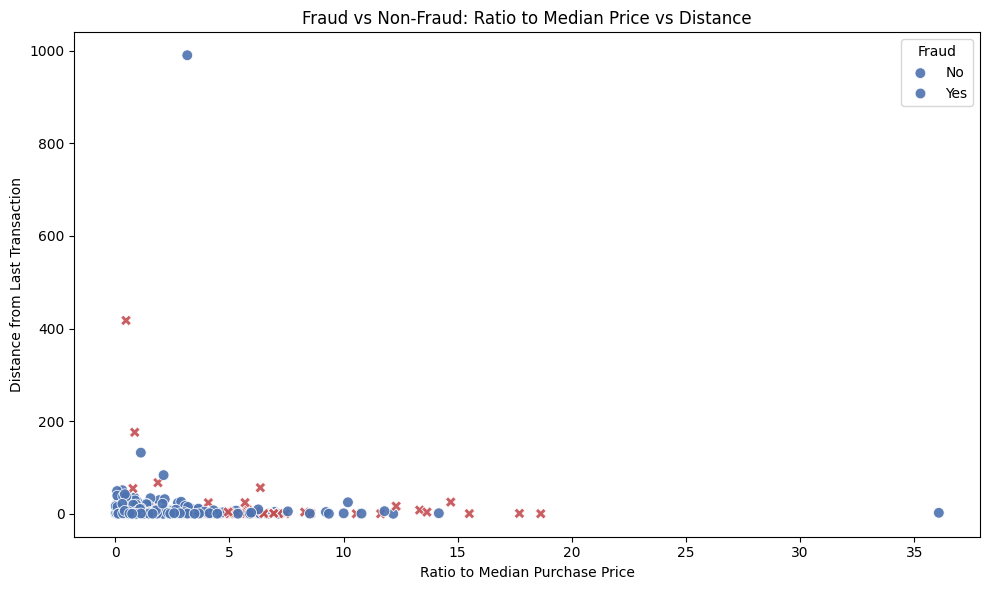

In [56]:
# Scatter showing breakdown of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x='ratio_to_median_purchase_price',
                y='distance_from_last_transaction',
                hue='fraud',
                style='fraud',
                palette={0:'#4c72b0',1:'#c44e52'},
                alpha=0.9,
                s=60)
plt.title('Fraud vs Non-Fraud: Ratio to Median Price vs Distance')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Distance from Last Transaction')
plt.legend(title='Fraud', labels=['No','Yes'])
plt.tight_layout()
plt.show()